In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import pandas
import tensorflow as tf

Adapted from iPython Cookbook [Chapter 12.4](https://ipython-books.github.io/124-simulating-a-partial-differential-equation-reaction-diffusion-systems-and-turing-patterns/)



In [0]:
# Define parameters
Du = 1e-4   # diffusion coefficient of activator
Dv = 5e-3   # diffusion coefficient of inhibitor
fu = 1      # production rate of activator
fv = 3      # production rate of inhibitor
gu = -1     # degradation rate of activator
gv = -2     # degradation rate of activator

# Discretize time and space
size = 25    # size of the 2D grid
dx = 2./size  # space step
T = 9.0       # total time
dt = 0.001    # time step
n = int(T/dt) # number of iterations 

# Initialize variables
U = np.random.rand(size,size)
V = np.random.rand(size,size)
# U = np.ones(size)
# V = np.zeros(size)
#print(U)
#print(V)

In [133]:
# Test parameter set for Turing instability conditions
p1 = fu + gv
p2 = fu*gv - fv*gu
p3 = Dv*fu + Du*gv
p4 = (Dv*fu + Du*gv)**2 - 4*Du*Dv*(fu*gv-fv*gu)
print(p1)
print(p2)
print(p3)
print(p4)

-1
1
0.0048000000000000004
2.1040000000000002e-05


In [0]:
# Define discrete Laplace operator, using five-point stencil finite difference method
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright - 4 * Zcenter) / dx**2
  
# Define function to display pattern
def show_patterns(U, umin, umax, ax=None):
    ax.imshow(U, cmap=plt.cm.viridis,
              #norm=col.Normalize(umin, umax),
              interpolation='bilinear',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()

In [0]:
# Define master function
def turing(Du, Dv, fu, fv, gu, gv):

    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    step_plot = n // 9
    
  # Create variable to store data for plots
  P = np.zeros(size,9)

    # Simulate the PDE with the finite difference method.
    for i in range(n):
        # We compute the Laplacian of u and v.
        deltaU = laplacian(U)
        deltaV = laplacian(V)
        # We take the values of u and v inside the grid.
        Uc = U[1:-1, 1:-1]
        Vc = V[1:-1, 1:-1]
        # We update the variables.
        U[1:-1, 1:-1], V[1:-1, 1:-1] = \
            Uc + dt * (Du * deltaU + fu*Uc + fv*Vc),\
            Vc + dt * (Dv * deltaV + gu*Uc + gv*Vc) 
        # Neumann conditions: derivatives at the edges are null.
        for Z in (U, V):
            Z[0, :] = Z[1, :]
            Z[-1, :] = Z[-2, :]
            Z[:, 0] = Z[:, 1]
            Z[:, -1] = Z[:, -2]

        # Store state of the system for subplots
        if i % step_plot == 0 and i < T * step_plot:
            P[:][:][i] = U

    umin = amin(U)
    umax = amax(U)
    
    # Plot system at different times
    for i in range(n):
      ax = axes.flat[i // step_plot]
      show_patterns(U, umin, umax, ax=ax)
      ax.set_title(f'$t={i * dt:.2f}$')

    # Plot final pattern
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    show_patterns(U, umin, umax, ax=ax)   
    ax.set_title(f'$t=T$')


TypeError: ignored

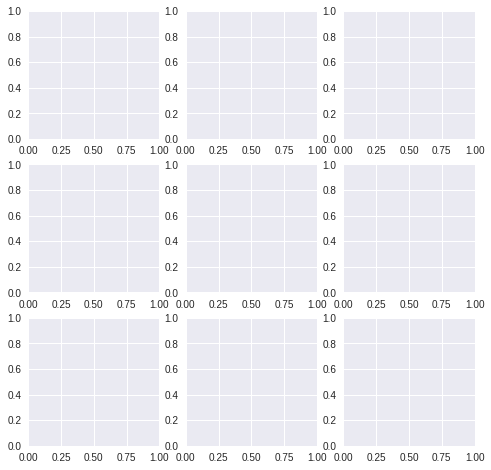

In [140]:
turing(Du, Dv, fu, fv, gu, gv)